Ini copas dari internet (buat jadi referensi)



(200, 2) (200,)


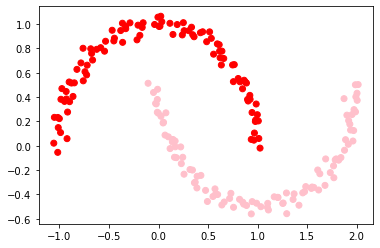

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.datasets import make_moons

np.random.seed(0)
data, labels = make_moons(n_samples=200,noise = 0.04,random_state=0)
print(data.shape, labels.shape)

color_map = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","pink"])
plt.scatter(data[:,0], data[:,1], c=labels, cmap=color_map)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split#Splitting the data into training and testing data
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)


(150, 2) (50, 2)


In [8]:
class FeedForwardNetwork:
 
 def __init__(self):
     np.random.seed(0)
     self.w1 = np.random.randn()
     self.w2 = np.random.randn()
     self.w3 = np.random.randn()
     self.w4 = np.random.randn()
     self.w5 = np.random.randn()
     self.w6 = np.random.randn()
     self.b1 = 0
     self.b2 = 0
     self.b3 = 0
 
 def sigmoid(self, x):
     return 1.0/(1.0 + np.exp(-x))
 
 def forward_pass(self, x):
     self.x1, self.x2 = x
     self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
     self.h1 = self.sigmoid(self.a1)
     self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
     self.h2 = self.sigmoid(self.a2)
     self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
     self.h3 = self.sigmoid(self.a3)
     forward_matrix = np.array([[0,0,0,0,self.h3,0,0,0], 
                      [0,0,(self.w5*self.h1),        (self.w6*self.h2),self.b3,self.a3,0,0],
                      [0,0,0,self.h1,0,0,0,self.h2],
                      [(self.w1*self.x1), (self.w2*self.x2),         self.b1, self.a1,(self.w3*self.x1),(self.w4*self.x2), self.b2,  self.a2]])
     forward_matrices.append(forward_matrix)
     return self.h3

In [25]:
class FeedForwardNetwork_Vectorised:
 
 def __init__(self):
    np.random.seed(0)
    self.W1 = np.random.randn(2,2)
    self.W2 = np.random.randn(2,1)
    self.B1 = np.zeros((1,2))
    self.B2 = np.zeros((1,1))
 
 def sigmoid(self, X):
    return 1.0/(1.0 + np.exp(-X))
 
 
 def forward_pass(self,X):
    self.A1 = np.matmul(X,self.W1) + self.B1 
    self.H1 = self.sigmoid(self.A1) 
    self.A2 = np.matmul(self.H1, self.W2) + self.B2
    self.H2 = self.sigmoid(self.A2) 
    return self.H2

ffn_v = FeedForwardNetwork_Vectorised()
ffn_v.forward_pass(X_train)

array([[0.74680041],
       [0.70022634],
       [0.48421485],
       [0.6470818 ],
       [0.76044078],
       [0.72492131],
       [0.58259395],
       [0.68175478],
       [0.58553591],
       [0.72745957],
       [0.67948245],
       [0.45878414],
       [0.75358062],
       [0.77924177],
       [0.55488996],
       [0.5691662 ],
       [0.64192607],
       [0.78055957],
       [0.72746492],
       [0.46516146],
       [0.78354368],
       [0.46973463],
       [0.71993656],
       [0.77610631],
       [0.74481201],
       [0.65331827],
       [0.69800807],
       [0.67358968],
       [0.76396575],
       [0.61886848],
       [0.60237268],
       [0.70134711],
       [0.44542862],
       [0.76511399],
       [0.75463325],
       [0.46317533],
       [0.7022096 ],
       [0.60417209],
       [0.73012384],
       [0.76953777],
       [0.65792742],
       [0.64128292],
       [0.77931947],
       [0.7721725 ],
       [0.64519697],
       [0.67004602],
       [0.76924104],
       [0.696

In [29]:
import seaborn as sns
import imageio
from IPython.display import HTML
def plot_heat_map(observation):
    fig = plt.figure(figsize=(10, 1))
    sns.heatmap(forward_matrices[observation], annot=True,     cmap=my_cmap, vmin=-3, vmax=3)
    plt.title("Observation "+str(observation))    
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] +(3,)) 
    return image
    
imageio.mimsave('./forwardpropagation_viz.gif', [plot_heat_map(i) for i in range(0,len(forward_matrices),len(forward_matrices)//15)], fps=1)

ValueError: range() arg 3 must not be zero

Websitenya : [Link sumber](https://towardsdatascience.com/forward-propagation-in-neural-networks-simplified-math-and-code-version-bbcfef6f9250)